# **TTTC3313 Mini Project**
GROUP NAME: KERIAN TEAM<br>
PROJECT TITLE: WINE QUALITY PREDICTION <br>
MEMBERS:
1. NG HAO LIN (A175838)
2. NG XING NING (A176493)
3. TAN JING XUAN (A175711)


# Import Libraries and Modules

The first part of our project is we imported the necessary libraries and modules.

In [1]:
import warnings
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Delete Warning Message

Since some of the outputs will give a lot of useless warning messages for this project, thus we tried to disable them.

In [2]:
warnings.filterwarnings("ignore")

# Read Dataset

We imported the dataset from the `winequalityN.csv` file and it returned a Pandas DataFrame object containing all the data. For understanding the data, we took a look at the first five rows of the data. It seems all of the data was in numeric form except the `type` column.

In [3]:
df = pd.read_csv("winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


To understand more about the data, we also used `info` to display the basic info of the dataset. It will show us the data type of each feature and the number of non-null values. Since there are 6497 total data in our dataset, thus there are some missing values that occurred for some features. Besides, we also noticed one `object` data type for our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# Visualization

To look at the overview of the distribution of the values, we plotted histograms to represent each feature. From that, we can visualize it more clearly.

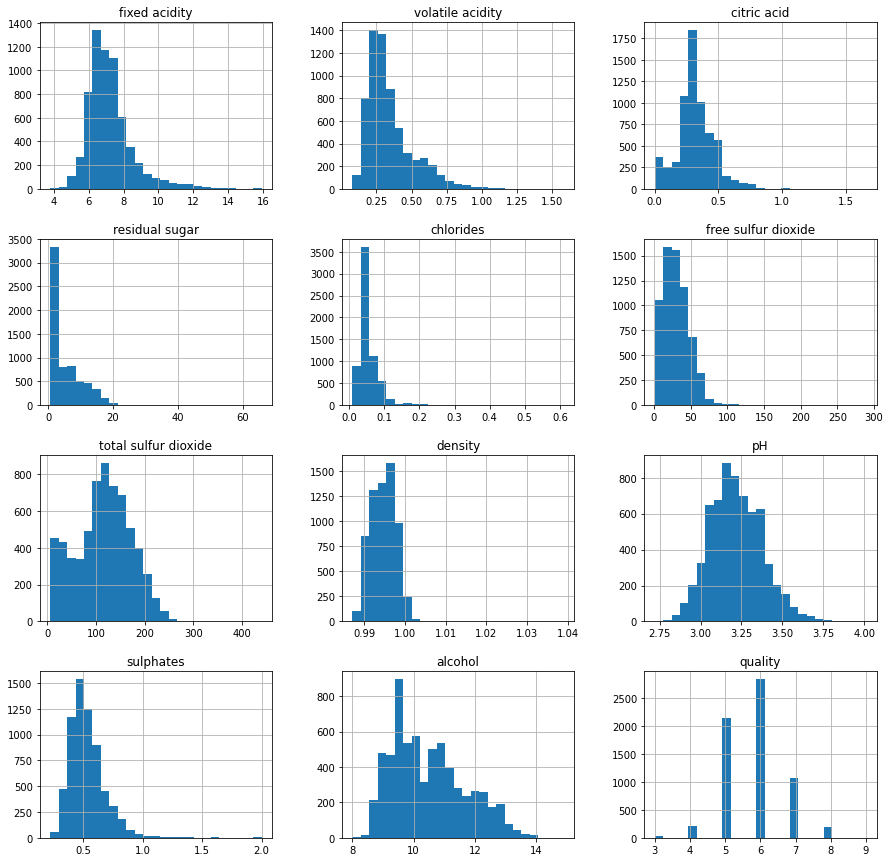

In [5]:
df.hist(bins=25,figsize=(15,15))
plt.show()

# Feature Selection

We used `seaborn` to plot a heatmap to figure out the correlation between each feature. From the heatmap, we noticed some very strongly correlated features (0.72), such as `free sulfur dioxide` and `total sulfur dioxide`.

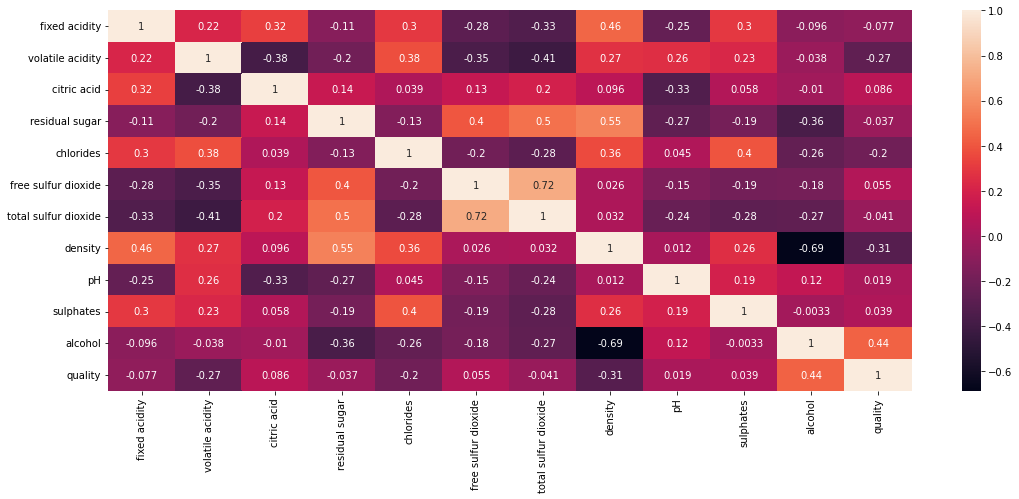

In [6]:
plt.figure(figsize=[18,7])
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)

Since `quality` is the most important feature in this project, we figure out and sort the correlation of all features with it. We noticed `alcohol` is the most strongly correlated feature with the `quality` feature. It means that `alcohol` is important to predict the `quality` of wine. It is an important feature and we have to due with it carefully.

In [7]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085706
free sulfur dioxide     0.055463
sulphates               0.038729
pH                      0.019366
residual sugar         -0.036825
total sulfur dioxide   -0.041385
fixed acidity          -0.077031
chlorides              -0.200886
volatile acidity       -0.265953
density                -0.305858
Name: quality, dtype: float64

We noticed that some features are strongly correlated together from the above heatmap. Thus, we identified which feature is highly correlated(with a value of more than 0.7) with other features.

In [8]:
for a in range(len(corr_matrix.columns)):
    for b in range(a):
        if abs(corr_matrix.iloc[a,b]) >0.7:
            n1 = corr_matrix.columns[a]
            n2 = corr_matrix.columns[b]
            print(n1,"\n",n2)

total sulfur dioxide 
 free sulfur dioxide


From the above heatmap and the printed name above, we noticed `total sulfur dioxide` having a correlation value greater than 0.7 with `free sulfur dioxide`. Since `total sulfur dioxide` has a less correlation with `quality` than the highly correlated `free sulfur dioxide`, we chose to drop the `total sulfur dioxide` column. We decided to drop one because those two features are strongly correlated (more than 0.7) and may give the same meaning. 

In [9]:
df = df.drop('total sulfur dioxide',axis=1)

# Handle Missing Values

From the basic info above, we knew that there are some missing values. Thus, we used `isnull()` to show the total number of missing values for each feature. From the result, we can notice that seven features have missing values. The largest missing value is only ten and it is not too much.

In [10]:
df.isnull().sum()

type                    0
fixed acidity          10
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

There are several ways to handle missing values, such as 
1. drop whole column that contain missing values
2. drop the rows that contain missing values
3. replace the missing values with some predefined values 

Since the missing value is less, thus we will not drop the entire columns. We will choose either to replace it or drop the rows. To identify the method of handling missing values, we looked at the `shape` of the missing data after dropping the rows. Since only 34 data will be dropped and it is only 0.5% of the whole data, we chose to drop the rows that contain missing values. It won't affect so much when we delete it.

In [11]:
print(df.shape)
print(df.dropna().shape)

(6497, 12)
(6463, 12)


We used `dropna()` to delete the rows that contain null values and it showed there are no missing values for each feature after we deleted it.

In [12]:
df = df.dropna()
df.isnull().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

# Handle Categorical Column

From the basic info above, we also can notice the `type` feature is not numeric data. Thus, we must handle this feature since a computer cannot understand `object` data. We `used value_counts()` to list out all types of data. It showed two types of data: ` white` and `red`.

In [13]:
df['type'].value_counts()

white    4870
red      1593
Name: type, dtype: int64

To handle this problem, we used `get_dummies()` function. It will convert `red` and `white` into the binary format. The `drop_first` parameter will remove the first level, `type_red`. We deleted it to prevent two columns give the same meaning. We knew from the `type_white` column that the white wine would be 1 and the red wine would be 0.

In [14]:
df = pd.get_dummies(df,drop_first = True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,5,0


# Dependent Features

From the histogram above, we noticed the values of dependent feature `quality` are in several ranges of number. We used `value_counts()` function to look to it more clearly. From the result, we can notice the range is quite messy. 

In [15]:
df['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

Basically, we will use classification techniques to fit the model for better accuracy. Thus, we made some fundamental changes to the dependent feature. We created a new column and named it as `best quality`. When the `quality` value is higher or equal to 7, it will be 1 and the rest will be 0. The new binary data were placed into the `best quality` column. The value 1 means the best quality and 0 is the opposite meaning. We also dropped the `quality` column since we will use `best quality` as our new dependent feature.

In [16]:
df['best quality']=[1 if x>=7 else 0 for x in df['quality']]
df = df.drop(['quality'],axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type_white,best quality
0,7.0,0.270,0.36,20.7,0.045,45.0,1.00100,3.00,0.45,8.8,1,0
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,0,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,0,0


We used `seaborn` to plot a histogram to visualize the new column `best quality`. 

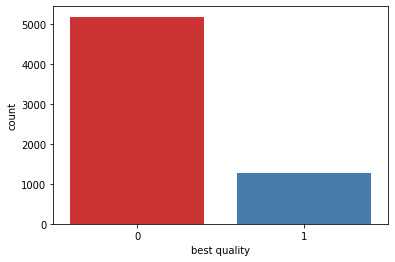

In [17]:
sns.countplot(df['best quality'], palette="Set1")

# Detecting and Handle Outliers

We used `describe()` method to display some statistical info of the dataset. We noticed `residual sugar` and `free sulfur dioxide` may have outliers from the information below. For `residual sugar`, 25% of the data are under 1.80 and 75% are under 8.10. The mean for `residual sugar` is 5.44, the min is 0.60 and the max is 65.80. Since the max value is too large compared to the mean and others, it looks like there are outliers. The same reason for `free sulfur dioxide` with `residual sugar`.

In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type_white,best quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,0.994698,3.218332,0.531150,10.492825,0.753520,0.196658
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,0.003001,0.160650,0.148913,1.193128,0.430995,0.397502
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,0.992330,3.110000,0.430000,9.500000,1.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,0.994890,3.210000,0.510000,10.300000,1.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,0.997000,3.320000,0.600000,11.300000,1.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


We used `seaborn` to plot a boxplot graph for visualizing the outlier of `residual sugar`.

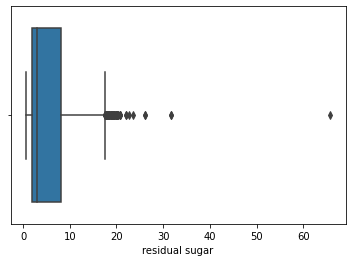

In [19]:
sns.boxplot(df['residual sugar'])

We used `seaborn` to plot a boxplot graph for visualizing the outlier of `free sulfur dioxide`.

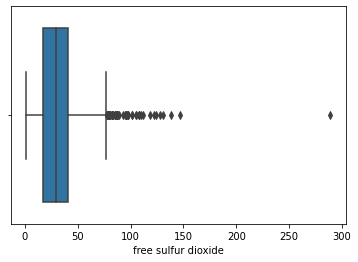

In [20]:
sns.boxplot(df['free sulfur dioxide'])

In most of the cases, the threshold for outlier detection is either `z-score > 3` or `z-score < -3`. We used the `zscore()` function by setting the threshold = 3 to determine the outliers. The result shows there are 484 outliers and we chose to drop them since outliers may increase the variability in the data, which decreases the statistical power. 

In [21]:
z = np.abs(stats.zscore(df))
print(df[(z < 3).all(axis=1)].shape)
df.shape

(5979, 12)


(6463, 12)

There are 484 (7.45%) data values that had been removed as outliers. There are 5979 rows of data left in the dataframe.

In [22]:
df = df[(z < 3).all(axis=1)]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type_white,best quality
1,6.3,0.300,0.34,1.6,0.049,14.0,0.99400,3.30,0.49,9.5,1,0
2,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,1,0
3,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,1,0
4,7.2,0.230,0.32,8.5,0.058,47.0,0.99560,3.19,0.40,9.9,1,0
5,8.1,0.280,0.40,6.9,0.050,30.0,0.99510,3.26,0.44,10.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,0.99651,3.42,0.82,9.5,0,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,0.99490,3.45,0.58,10.5,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,0.99574,3.42,0.75,11.0,0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,0.99547,3.57,0.71,10.2,0,0


# Splitting the Data Into Training and Test Sets

We used the `train_test_split()` technique to split the data into training and testing subsets. 30% of data was split as testing data and 70% as training.

In [23]:
x = df.drop(['best quality'],axis=1)
y = df['best quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4185, 11) (1794, 11) (4185,) (1794,)


# Export Training and Testing Dataset to CSV

The data frame below shows the training subset. There are 4185 data in the training subset.

In [24]:
training_df = pd.concat([x_train,y_train],axis=1)
training_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type_white,best quality
2895,6.4,0.44,0.26,2.00,0.054,20.0,0.99520,3.58,0.57,10.0,1,0
2302,6.0,0.26,0.18,7.00,0.055,50.0,0.99591,3.21,0.43,9.0,1,0
2910,6.1,0.37,0.20,7.60,0.031,49.0,0.99558,3.22,0.48,9.5,1,0
1259,6.2,0.21,0.38,6.80,0.036,64.0,0.99510,3.06,0.36,9.3,1,0
462,5.9,0.25,0.19,12.40,0.047,50.0,0.99730,3.35,0.38,9.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6475,6.2,0.70,0.15,5.10,0.076,13.0,0.99622,3.54,0.60,11.9,0,0
3483,6.1,0.36,0.26,8.15,0.035,14.0,0.99031,3.06,0.27,13.0,1,1
5856,6.4,0.57,0.12,2.30,0.120,25.0,0.99519,3.47,0.71,11.3,0,1
3199,6.8,0.21,0.40,6.30,0.032,40.0,0.99214,3.18,0.53,12.0,1,1


We used the `to_csv()` function to save the training subset as CSV for backup.

In [25]:
training_df.to_csv('training.csv',index=False)

The data frame below shows the testing subset. There are 1794 data in the testing subset.

In [26]:
testing_df = pd.concat([x_test,y_test],axis=1)
testing_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,type_white,best quality
1453,7.6,0.520,0.49,14.0,0.034,37.0,0.99580,3.14,0.38,11.8,1,1
5001,8.1,0.575,0.22,2.1,0.077,12.0,0.99670,3.29,0.51,9.2,0,0
5469,6.2,0.360,0.24,2.2,0.095,19.0,0.99460,3.57,0.57,11.7,0,0
5435,8.1,0.825,0.24,2.1,0.084,5.0,0.99720,3.37,0.77,10.7,0,0
6,6.2,0.320,0.16,7.0,0.045,30.0,0.99490,3.18,0.47,9.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2165,7.0,0.350,0.31,1.8,0.069,15.0,0.99440,3.18,0.47,9.4,1,0
4082,5.9,0.230,0.28,8.6,0.046,37.0,0.99432,3.23,0.53,10.6,1,0
1691,7.2,0.250,0.28,14.4,0.055,55.0,0.99860,3.12,0.38,9.0,1,1
1711,7.0,0.200,0.30,6.1,0.037,31.0,0.99390,3.24,0.51,10.8,1,0


We used the `to_csv()` function to save the testing subset as CSV for backup.

In [27]:
testing_df.to_csv('testing.csv',index=False)

# Normalization

Normalization was done for our project since each data range is very high. We used the `MinMaxScaler()` technique to scale the independent features. The data will be rescaled on the min-max scale and range between 0 and 1.

In [28]:
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
scaled_x_train = norm_fit.transform(x_train)
scaled_x_test = norm_fit.transform(x_test)
scaled_x_train

array([[0.29850746, 0.48      , 0.35135135, ..., 0.45945946, 0.28318584,
        1.        ],
       [0.23880597, 0.24      , 0.24324324, ..., 0.27027027, 0.10619469,
        1.        ],
       [0.25373134, 0.38666667, 0.27027027, ..., 0.33783784, 0.19469027,
        1.        ],
       ...,
       [0.29850746, 0.65333333, 0.16216216, ..., 0.64864865, 0.51327434,
        0.        ],
       [0.35820896, 0.17333333, 0.54054054, ..., 0.40540541, 0.63716814,
        1.        ],
       [0.23880597, 0.33333333, 0.27027027, ..., 0.40540541, 0.46017699,
        1.        ]])

# Modeling

### Logistic Regression

Logistic Regression is one of the models we used to predict wine quality. We used `GridSearchCV` to find out the best parameter with its best score to get a better result.

In [29]:
param = {'solver': ['liblinear', 'lbfgs'],
         'penalty':['l1','l2']}
reg = LogisticRegression()
grid_lr = GridSearchCV(reg, param, cv=10, scoring='accuracy')
grid_lr.fit(scaled_x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_lr.best_score_, grid_lr.best_params_))

Best: 0.817442 using {'penalty': 'l2', 'solver': 'lbfgs'}


After getting the best parameter, we used it in our model for prediction. Then, we print out the classification report for Logistic Regression to know the performance.

In [30]:
lr_model = grid_lr.best_estimator_

y_pred_LR = lr_model.predict(scaled_x_test)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1427
           1       0.61      0.29      0.39       367

    accuracy                           0.82      1794
   macro avg       0.73      0.62      0.64      1794
weighted avg       0.79      0.82      0.79      1794



### RandomForest

The process for the Random Forest model is the same as the Logistic Regression model. We used `GridSearchCV` to find out the best parameter with its best score to get a better result before making a prediction.

In [31]:
param = {'criterion' : ['gini', 'entropy'],
         'max_features': [2, 4, 6, 8, 10],
         'n_estimators': [30, 60, 80, 100]}

reg = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(reg, param, cv=10, scoring='accuracy')
grid_rf.fit(scaled_x_train, y_train)

#summarize results
print("Best: %f using %s" % (grid_rf.best_score_, grid_rf.best_params_))

Best: 0.871440 using {'criterion': 'entropy', 'max_features': 2, 'n_estimators': 80}


The below shows the classification report for Random Forest for us to know the model's performance.

In [32]:
rf_model = grid_rf.best_estimator_

y_pred_RF = rf_model.predict(scaled_x_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1427
           1       0.79      0.56      0.66       367

    accuracy                           0.88      1794
   macro avg       0.84      0.76      0.79      1794
weighted avg       0.87      0.88      0.87      1794



### SVM

SVM is the third model used in our project. The process is the same as Logistic Regression and Random Forest. We used `GrideSearchCV` to find out the model's best score and best parameter.

In [33]:
param = {
    'C': [1, 5, 10, 100, 1000],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
}
reg = SVC()
grid_svm = GridSearchCV(reg, param_grid=param, scoring='accuracy', cv=10)
grid_svm.fit(scaled_x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_svm.best_score_, grid_svm.best_params_))

Best: 0.834642 using {'C': 100, 'gamma': 1.4, 'kernel': 'rbf'}


Below is the same process as above. We printed out the classification report for the SVM model after we got the best parameter. We can know the performance of SVM through the report.

In [34]:
svm_model = grid_svm.best_estimator_

y_pred_SVM = svm_model.predict(scaled_x_test)
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1427
           1       0.64      0.44      0.53       367

    accuracy                           0.84      1794
   macro avg       0.76      0.69      0.71      1794
weighted avg       0.82      0.84      0.82      1794

